<a href="https://colab.research.google.com/github/HabibaJahn/Rice_disease_detection/blob/habiba/Model_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

In [ ]:
# path creation
original_dataset_dir = '/content/drive/My Drive/Ai Project/dataset'
base_dir = '/content/drive/My Drive/Ai Project/split_dataset'

# test train validation folders
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# duplicate checking
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

classes = os.listdir(original_dataset_dir)

# classes checking and ignoring anything other than class
for class_name in classes:
    class_path = os.path.join(original_dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # image shuffling
    images = os.listdir(class_path)
    images = [img for img in images if os.path.isfile(os.path.join(class_path, img))]
    random.shuffle(images)

    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    for img in train_imgs:
      shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in val_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))
    for img in test_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("✅ Dataset successfully split into train, val, and test sets!")


✅ Dataset successfully split into train, val, and test sets!


In [ ]:
import os

base_dir = '/content/drive/My Drive/Ai Project/split_dataset'
splits = ['train', 'val', 'test']

for split in splits:
    split_path = os.path.join(base_dir, split)
    print(f"\n📁 {split.upper()} set:")

    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if not os.path.isdir(class_path):
            continue

        num_images = len([
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f))
        ])
        print(f"  🏷️ Class '{class_name}': {num_images} images")



📁 TRAIN set:
  🏷️ Class 'Narrow Brown Leaf Spot': 555 images
  🏷️ Class 'Neck_Blast': 700 images
  🏷️ Class 'Sheath Blight': 1045 images
  🏷️ Class 'Healthy Rice Leaf': 689 images
  🏷️ Class 'Bacterial Leaf Blight': 787 images
  🏷️ Class 'Brown Spot': 1031 images
  🏷️ Class 'Rice Hispa': 742 images
  🏷️ Class 'Leaf Blast': 1206 images
  🏷️ Class 'Leaf scald': 932 images

📁 VAL set:
  🏷️ Class 'Narrow Brown Leaf Spot': 119 images
  🏷️ Class 'Neck_Blast': 150 images
  🏷️ Class 'Sheath Blight': 224 images
  🏷️ Class 'Healthy Rice Leaf': 148 images
  🏷️ Class 'Bacterial Leaf Blight': 169 images
  🏷️ Class 'Brown Spot': 221 images
  🏷️ Class 'Rice Hispa': 159 images
  🏷️ Class 'Leaf Blast': 259 images
  🏷️ Class 'Leaf scald': 200 images

📁 TEST set:
  🏷️ Class 'Narrow Brown Leaf Spot': 119 images
  🏷️ Class 'Neck_Blast': 150 images
  🏷️ Class 'Sheath Blight': 224 images
  🏷️ Class 'Healthy Rice Leaf': 148 images
  🏷️ Class 'Bacterial Leaf Blight': 169 images
  🏷️ Class 'Brown Spot': 222 im

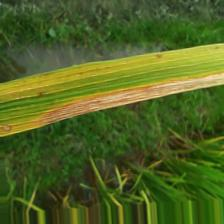

In [ ]:
from PIL import Image
import IPython.display as display

# Example path to an image in your split dataset
image_path = '/content/drive/My Drive/Ai Project/split_dataset/train/Bacterial Leaf Blight/aug_0_676.jpg'

# Open and display the image
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=300))



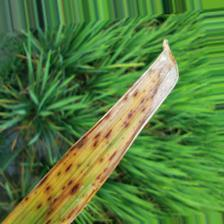

In [ ]:
from PIL import Image
import IPython.display as display

# Example path to an image in your split dataset
image_path = '/content/drive/My Drive/Ai Project/split_dataset/test/Narrow Brown Leaf Spot/aug_0_2969.jpg'

# Open and display the image
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=300))

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Ai Project/split_dataset/train',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Ai Project/split_dataset/val',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Ai Project/split_dataset/test',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: do not shuffle for accurate evaluation
)

Found 7687 images belonging to 9 classes.
Found 1649 images belonging to 9 classes.
Found 1651 images belonging to 9 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(225, 225, 3))
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(9, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=2,
    min_lr=1e-6
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=20,  # Start with more
    validation_data=validation_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 3118s 13s/step - accuracy: 0.4529 - loss: 1.5317 - val_accuracy: 0.7126 - val_loss: 0.8151
Epoch 2/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.6692 - loss: 0.9365 - val_accuracy: 0.7508 - val_loss: 0.6915
Epoch 3/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 213s 885ms/step - accuracy: 0.7226 - loss: 0.7878 - val_accuracy: 0.7914 - val_loss: 0.5710
Epoch 4/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 211s 874ms/step - accuracy: 0.7484 - loss: 0.7125 - val_accuracy: 0.7920 - val_loss: 0.5530
Epoch 5/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 211s 874ms/step - accuracy: 0.7734 - loss: 0.6450 - val_accuracy: 0.8211 - val_loss: 0.4860
Epoch 6/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 214s 887ms/step - accuracy: 0.7863 - loss: 0.6148 - val_accuracy: 0.8375 - val_loss: 0.4511
Epoch 7/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 213s 885ms/step - accuracy: 0.8073 - loss: 0.5642 - val_accuracy: 0.8417 - val_loss: 0.4231
Epoch 8/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 221s 915ms/step - accuracy: 0.8077 - los

In [ ]:
model.save('/content/drive/My Drive/Ai Project/efficientnet_model1.keras')


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
model = load_model("/content/drive/My Drive/Ai Project/efficientnet_model1.keras")

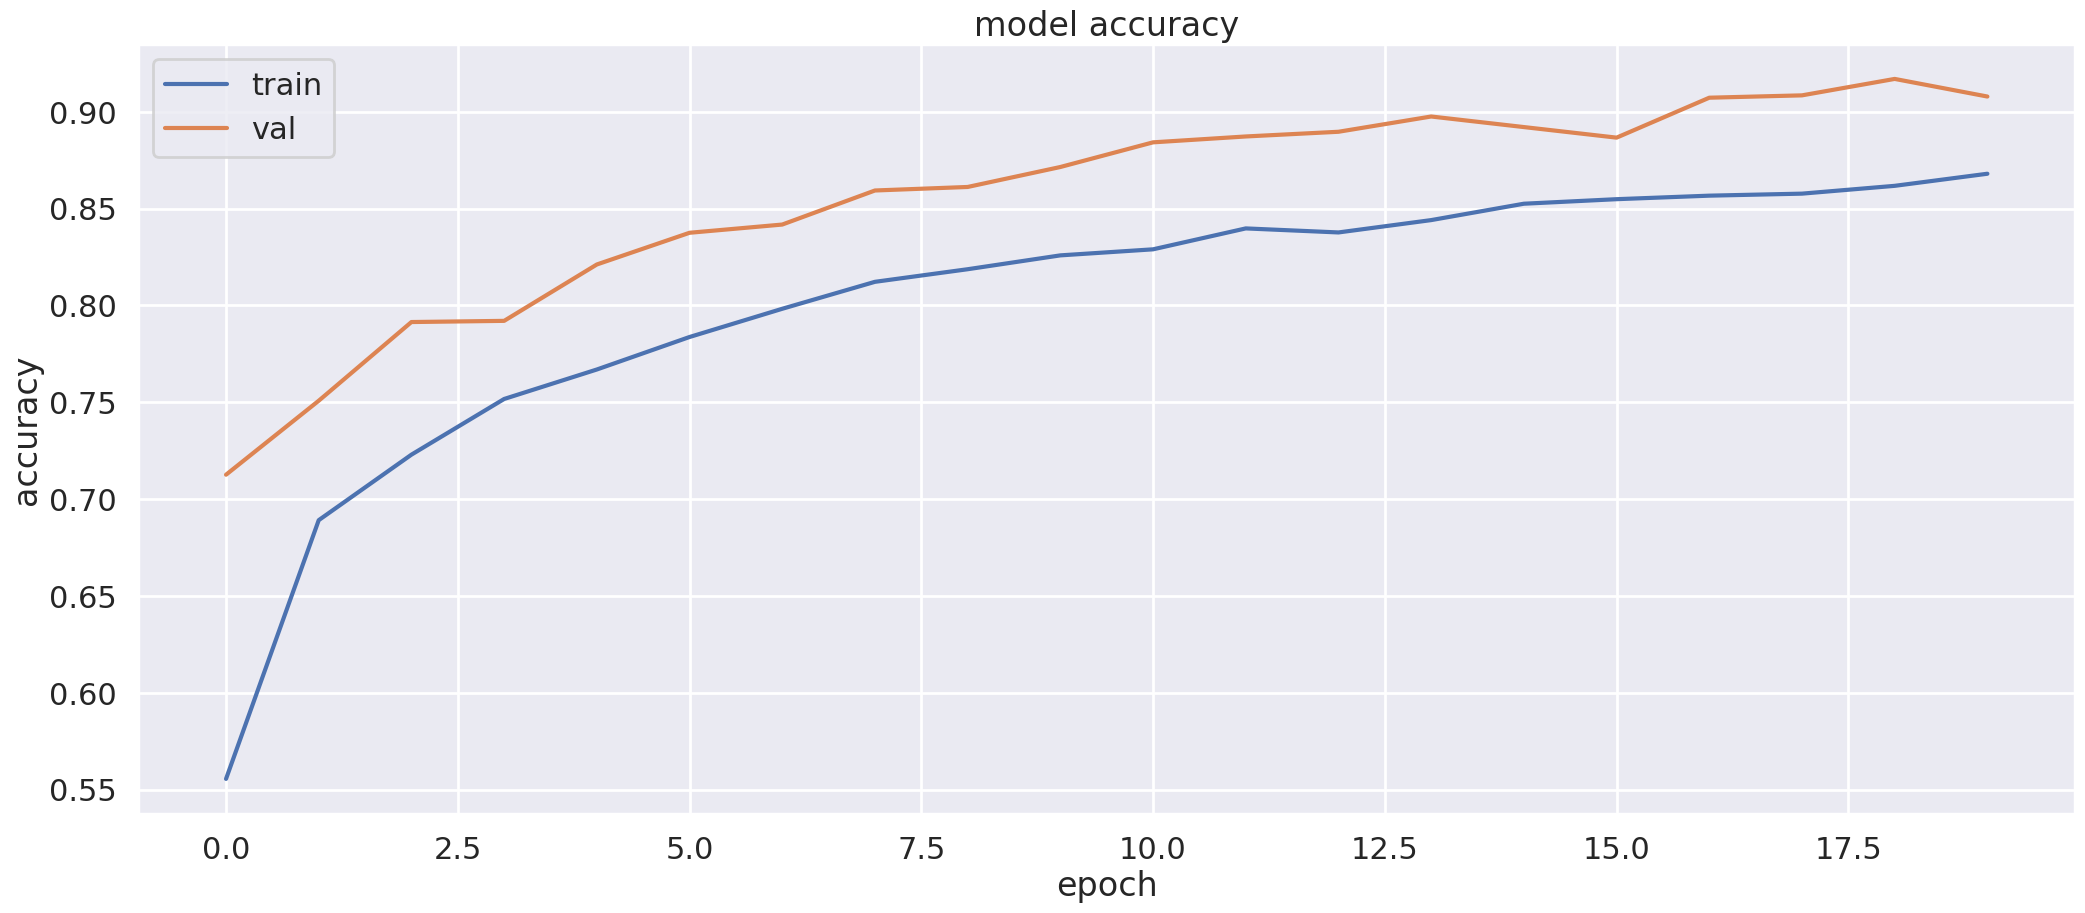

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 10), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:


import numpy as np

y_pred_probs = model.predict(test_generator)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

52/52 ━━━━━━━━━━━━━━━━━━━━ 582s 11s/step


In [ ]:


from sklearn.metrics import classification_report, accuracy_score

print("✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

acc = accuracy_score(y_true, y_pred)
print(f"🔍 Overall Test Accuracy: {acc:.4f}")

✅ Classification Report:
                        precision    recall  f1-score   support

 Bacterial Leaf Blight       0.86      0.94      0.90       169
            Brown Spot       0.90      0.91      0.90       222
     Healthy Rice Leaf       0.95      0.99      0.97       148
            Leaf Blast       0.92      0.90      0.91       259
            Leaf scald       0.89      0.95      0.92       200
Narrow Brown Leaf Spot       0.87      0.70      0.78       119
            Neck_Blast       1.00      1.00      1.00       150
            Rice Hispa       0.95      0.91      0.93       160
         Sheath Blight       0.96      0.96      0.96       224

              accuracy                           0.92      1651
             macro avg       0.92      0.92      0.92      1651
          weighted avg       0.92      0.92      0.92      1651

🔍 Overall Test Accuracy: 0.9225


In [2]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/Ai Project/efficientnet_model.keras")
model.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 225, 225, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 225, 225, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 225, 225, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 225, 225, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 227, 227, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 113, 113, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 113, 113, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 113, 113, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 113, 113, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 113, 113, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 113, 113, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,544,960 (17.34 MB)

 Trainable params: 165,129 (645.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 330,260 (1.26 MB)